#How do Audio fingerprints work?

Audio Fingerprints:


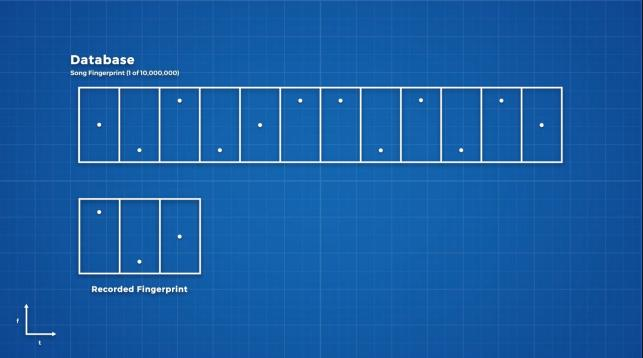







Note duration:


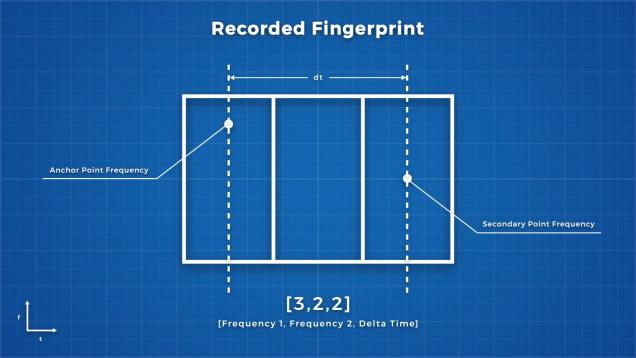

Hash tables and song info:


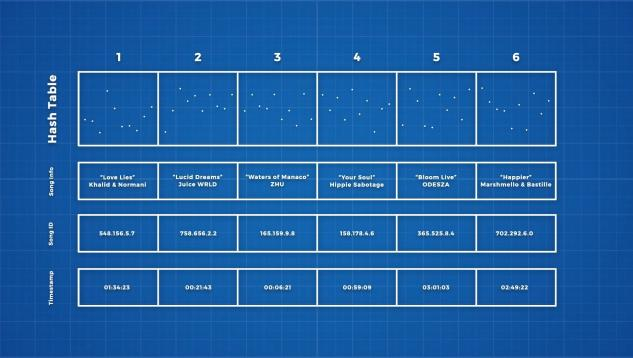

## Importing necessary libraries

In [ ]:
!pip uninstall pyacoustid

In [ ]:
!pip uninstall chromaprint

In [ ]:
pip install pyacoustid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyacoustid: filename=pyacoustid-1.2.2-py3-none-any.whl size=12719 sha256=94d12bed04c6695f063427b1b885d56a7663eb43fbfa2487c7739cf3a4373422
  Stored in directory: /root/.cache/pip/wheels/b6/cb/29/a510d614248bde0508243db6c65d6863249262a917edab5d70
Successfully built pyacoustid


In [ ]:
!git clone https://github.com/acoustid/chromaprint.git

Cloning into 'chromaprint'...
remote: Enumerating objects: 3403, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (356/356), done.
remote: Total 3403 (delta 184), reused 527 (delta 167), pack-reused 2850
Receiving objects: 100% (3403/3403), 2.80 MiB | 12.70 MiB/s, done.
Resolving deltas: 100% (1976/1976), done.


In [ ]:
!cd chromaprint
!cmake .
! make

CMake Warning:
  Ignoring extra path from command line:

   "."


CMake Error: The source directory "/content" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.


### Fingerprinting two songs



In [ ]:
from operator import xor
from typing import List

# These imports should be in your Python module path
# after installing the `pyacoustid` package from PyPI.
import acoustid #fingerprint_file fn reads the audio file and generates an encoded fingerprint
import chromaprint #decode_fingerprint fn decodes it into a list of 32-bit integers representing the audio fingerprint


def get_fingerprint(filename: str) -> List[int]:
    """
    Reads an audio file from the filesystem and returns a
    fingerprint.

    Args:
        filename: The filename of an audio file on the local
            filesystem to read.

    Returns:
        Returns a list of 32-bit integers. Two fingerprints can
        be roughly compared by counting the number of
        corresponding bits that are different from each other.
    """
    _, encoded = acoustid.fingerprint_file(filename)
    fingerprint, _ = chromaprint.decode_fingerprint(
        encoded
    )
    return fingerprint




###Comparing two songs using hamming distance



In [ ]:
def fingerprint_distance(
    f1: List[int],
    f2: List[int],
    fingerprint_len: int,
) -> float:
    """
    Returns a normalized distance between two fingerprints.

    Args:
        f1: The first fingerprint.

        f2: The second fingerprint.

        fingerprint_len: Only compare the first `fingerprint_len`
            integers in each fingerprint. This is useful
            when comparing audio samples of a different length.

    Returns:
        Returns a number between 0.0 and 1.0 representing
        the distance between two fingerprints. This value
        represents distance as like a percentage.
    """
    max_hamming_weight = 32 * fingerprint_len
    hamming_weight = sum(
        sum(
            c == "1"
            for c in bin(xor(f1[i], f2[i]))
        )
        for i in range(fingerprint_len)
    )
    return hamming_weight / max_hamming_weight

###Checking the similarity

In [ ]:
f1 = get_fingerprint("/content/audiocli1.mp3")
f2 = get_fingerprint("/content/audiocli3.mp3")
f_len = min(len(f1), len(f2))
fingerprint_distance(f1, f2, f_len)

0.5014097744360902

In [ ]:
len(f2)

133